# Annex 80 Weather Data Task Force Workshop - Day 1

## Extracting CORDEX Data from NETCDF4 Files

**Release history**

v0 : 2020-09-15

**License**

Licensed by La Rochelle University/LaSIE under a BSD 3 license (https://opensource.org/licenses/BSD-3-Clause).

**To use this code please cite the following publication:**

*Machard, A. , Inard, C., Alessandrini, J.M., Pelé, C., Ribéron, J.
A Methodology for Assembling Future Weather Files Including Heatwaves for Building Thermal Simulations from the European Coordinated Regional Downscaling Experiment (EURO-CORDEX) Climate Data*

https://www.mdpi.com/1996-1073/13/13/3424

**Data**

Data for this workshop were downloaded from the CORDEX Platform https://cordex.org/

In [1]:
# Importing Modules
from __future__ import division
import numpy as np
import netCDF4
import pandas as pd
from glob import glob
import xarray as xr
from netCDF4 import num2date

In [2]:
# Declaring the coordinates of our city point (Here Trappes - rural station for Paris)
# City point must be the exact same one for which observations were collected
lat = 33.9416 # 34.06694 downtown chicago
lon = 360 - 118.4085 #241.77333 

In [3]:
# Inserting path where the .nc files are located
data = r'/Users/xuanluo/Documents/cordex/cordex-81-00'

In [4]:
# Importing the netcdf files and storing them in files
files = glob(data + "/*.nc") 

In [5]:
# Checking the files have been imported
files

['/Users/xuanluo/Documents/cordex/cordex-81-00/rsus_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_208801010130-208812312230.nc',
 '/Users/xuanluo/Documents/cordex/cordex-81-00/rsus_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209501010130-209512312230.nc',
 '/Users/xuanluo/Documents/cordex/cordex-81-00/sfcWind_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209701010100-209712312200.nc',
 '/Users/xuanluo/Documents/cordex/cordex-81-00/hurs_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_208601010100-208612312200.nc',
 '/Users/xuanluo/Documents/cordex/cordex-81-00/rsds_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209701010130-209712312230.nc',
 '/Users/xuanluo/Documents/cordex/cordex-81-00/huss_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_208101010100-208112312200.nc',
 '/Users/xuanluo/Documents/cordex/cordex-81-00/ps_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209301010100-209312312200.nc'

In [6]:
# Functions definitions

def get_name_var(path):
    # Getting the variable name by splitting the caracter chain
    name = path.split("_")[0].split('/')[-1]
    return name

def get_index(path):
    # Opening the path file as an xarray, getting the time index as a cftime index, converting it to a datetime index
    idx = xr.open_dataset(path).indexes['time'].to_pydatetime()
    return idx

# Variables definitions as empty lists
names, idxs = [], []

for f in files:
    n = get_name_var(f) # Calling the function get_name_var and storing the variables names of all .nc files in "names"
    names.append(n)

for f in files:
    i = get_index(f)  # Calling the function get_index and storing the indexes of all .nc files in "idxs"
    idxs.append(i)

In [7]:
# Printing the list names to make sure it contains all variable names
names

['rsus',
 'rsus',
 'sfcWind',
 'hurs',
 'rsds',
 'huss',
 'ps',
 'ps',
 'rsus',
 'sfcWind',
 'hurs',
 'rsds',
 'tas',
 'rsus',
 'rsus',
 'rsus',
 'tas',
 'rsds',
 'hurs',
 'sfcWind',
 'huss',
 'ps',
 'ps',
 'ps',
 'ps',
 'ps',
 'huss',
 'rsds',
 'sfcWind',
 'rsus',
 'tas',
 'huss',
 'sfcWind',
 'hurs',
 'rsds',
 'hurs',
 'rsds',
 'sfcWind',
 'tas',
 'rsus',
 'hurs',
 'tas',
 'rsus',
 'sfcWind',
 'hurs',
 'rsds',
 'hurs',
 'rsds',
 'sfcWind',
 'huss',
 'ps',
 'ps',
 'huss',
 'huss',
 'rsds',
 'hurs',
 'sfcWind',
 'tas',
 'rsus',
 'tas',
 'tas',
 'tas',
 'tas',
 'rsds',
 'hurs',
 'sfcWind',
 'huss',
 'huss',
 'ps',
 'huss',
 'rsus',
 'tas',
 'sfcWind',
 'rsds',
 'hurs',
 'rsds',
 'hurs',
 'sfcWind',
 'huss',
 'ps',
 'ps',
 'huss',
 'sfcWind',
 'rsds',
 'hurs',
 'rsds',
 'hurs',
 'sfcWind',
 'rsus',
 'tas',
 'rsds',
 'sfcWind',
 'tas',
 'tas',
 'rsus',
 'sfcWind',
 'hurs',
 'rsds',
 'huss',
 'huss',
 'ps',
 'ps',
 'huss',
 'huss',
 'sfcWind',
 'hurs',
 'rsds',
 'tas',
 'tas',
 'rsus',
 'p

In [8]:
idxs

[array([datetime.datetime(2088, 1, 1, 1, 30),
        datetime.datetime(2088, 1, 1, 4, 30),
        datetime.datetime(2088, 1, 1, 7, 30), ...,
        datetime.datetime(2088, 12, 31, 16, 30),
        datetime.datetime(2088, 12, 31, 19, 30),
        datetime.datetime(2088, 12, 31, 22, 30)], dtype=object),
 array([datetime.datetime(2095, 1, 1, 1, 30),
        datetime.datetime(2095, 1, 1, 4, 30),
        datetime.datetime(2095, 1, 1, 7, 30), ...,
        datetime.datetime(2095, 12, 31, 16, 30),
        datetime.datetime(2095, 12, 31, 19, 30),
        datetime.datetime(2095, 12, 31, 22, 30)], dtype=object),
 array([datetime.datetime(2097, 1, 1, 1, 0),
        datetime.datetime(2097, 1, 1, 4, 0),
        datetime.datetime(2097, 1, 1, 7, 0), ...,
        datetime.datetime(2097, 12, 31, 16, 0),
        datetime.datetime(2097, 12, 31, 19, 0),
        datetime.datetime(2097, 12, 31, 22, 0)], dtype=object),
 array([datetime.datetime(2086, 1, 1, 1, 0),
        datetime.datetime(2086, 1, 1, 4, 0)

In [9]:
# Printing the lenght of the list to make sure all the file names have been imported
# We have 120 files and 120 names (20 years x 6 variables)
len(names)

140

In [10]:
len(idxs)

140

In [11]:
# Function definition
# This function opens the netcdf file, explores it, calculate the distance between each grid point and our city point
# & Gets the variable at the closest point of the grid to our city point

def get_data(file_path, variable, idx, lat=lat, lon=lon):
    
    print('File path:', file_path)
    print('Variable:',variable)
        
    # Opening the netCDF4 file and storing it in the variable nc
    nc = netCDF4.Dataset(file_path, mode='r')
    
    # Creating emptly lists of latitudes & longitudes
    list_lat, list_lon = [], []
    
    # Storing all the latitudes of the file in list_lat & all the longitudes in list_lon
    # Iterating through the 2 lists
    for (i,liste) in zip(['lat','lon'],[list_lat,list_lon]):
        # Iterating through the netCDF4 file (nc)
        for liste_i in nc.variables[i][:, :].tolist():
            liste+=[lat for lat in liste_i]

        print('Lenght of list_lat:',len(list_lat),'Length of list_lon:',len(list_lon))
       
    D = 9.E15
    # Creating v, a vector which contains our city point coordinates
    v = np.array([lat, lon])
    
    # Calculating, for each grid point (lat, lon) of the NETCDF4 file, the distance between that point & our city point
    for (lat_i,lon_j) in zip(list_lat,list_lon):
        # Calculating the distance using the function np.linalg.norm which calculates the norm of the vector
        Dij = np.linalg.norm(np.array([lat_i,lon_j]) - v)
        # If the distance is inferior to the distance stored before, we update lat0 & lon0
        # At the end of the loop, once we have compared all distances, the coordinates of the closest grid point 
        # are in lat0, lon0
        if Dij < D:
            lat0,lon0 = lat_i,lon_j
        # Updating D
        D = min(D,Dij)
    # Creating ij0, an array which containts the index of the closest grid point to our city point
    ij0 = np.where(nc.variables['lat'][:, :]==lat0)
    
    print('Smallest Distance D:',D)
    print('lat:',lat0)
    print('lon:',lon0)
    print('ij index:',ij0[0][0],ij0[1][0])
    
        
    # Storing in var the variable at the closest grid point to our city point: lat0, lon0
    var = nc.variables[variable][:,ij0[0][0], ij0[1][0]]
    print('Variable:',var)
        
    # Creating a pandas series that contains the variable associated to its time index
    s = pd.Series(var, index=idx)
        
    # Closing the NetCDF4 file
    nc.close()
    
    # Returnin the variable Series
    return s

In [12]:
# EXAMPLE for the 1st Temperature file #
a = get_data(files[1], names[1], idxs[1],lat,lon)

File path: /Users/xuanluo/Documents/cordex/cordex-81-00/rsus_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209501010130-209512312230.nc
Variable: rsus
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [ 0.42874995 -0.         -0.         ... 19.182117   47.670002
 32.433674  ]


In [13]:
# Printing our serie
# a

In [14]:
# Converting Temperature from K to °C
s2 = a - 273.15

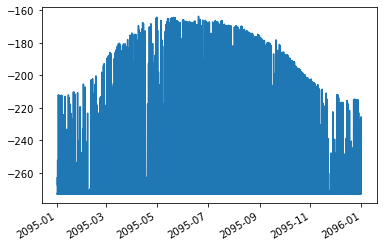

In [15]:
# Plotting Temperature
s2.plot()

## Please Run all the cells below AFTER the workshop as it will take some time to compute.

In [16]:
# We create 6 empty series, one for each weather variable
# If your CORDEX domain do not have the cloud cover, delete cc
# If you have 3hourly data, we use specific humidity (huss), the relative humidity is not needed as we will recalculate it after the interpolation
# If you have hourly data, we use relative humidity (hurs)

import datetime
beg = datetime.datetime.now()

S_temp, S_hs, S_wind, S_cc, S_rs, S_pa = pd.Series([]), pd.Series([]), pd.Series([]), pd.Series([]), pd.Series([]), pd.Series([])

# Iterating through each .nc file (list files), through each variable (list names), and through each year (list idxs)

for f, n, i in zip (files, names, idxs):
        
# Calling the function get_data
    
    # Storing the series with the data in new
    new = get_data(f, n, i)
        
    print(new.head())
    
    # If the name of the series is tas, it will be added to the series temperature (S_temp)
    if n == 'tas':
        S_temp = S_temp.append(new)
        
    # If the name of the series is clt, it will be added to the series cloud cover (S_cc)
    if n == 'clt':
        S_cc = S_cc.append(new)
    # ...etc
    if n == 'huss':
        S_hs = S_hs.append(new)
    if n == 'ps':
        S_pa = S_pa.append(new)
    if n == 'rsds':
        S_rs = S_rs.append(new)
    if n == 'sfcWind':
        S_wind = S_wind.append(new)


end = datetime.datetime.now()

<ipython-input-16-40991fa18f86>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  S_temp, S_hs, S_wind, S_cc, S_rs, S_pa = pd.Series([]), pd.Series([]), pd.Series([]), pd.Series([]), pd.Series([]), pd.Series([])


File path: /Users/xuanluo/Documents/cordex/cordex-81-00/rsus_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_208801010130-208812312230.nc
Variable: rsus
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [ 2.2825770e-02 -0.0000000e+00 -0.0000000e+00 ...  2.3443035e+01
  5.9012707e+01  3.8627087e+01]
2088-01-01 01:30:00    0.022826
2088-01-01 04:30:00   -0.000000
2088-01-01 07:30:00   -0.000000
2088-01-01 10:30:00   -0.000000
2088-01-01 13:30:00   -0.000000
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/rsus_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209501010130-209512312230.nc
Variable: rsus
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.655776977

Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [ 1.3254528 -0.        -0.        ...  9.787067  44.278763  31.067703 ]
2089-01-01 01:30:00    1.325453
2089-01-01 04:30:00   -0.000000
2089-01-01 07:30:00   -0.000000
2089-01-01 10:30:00   -0.000000
2089-01-01 13:30:00   -0.000000
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/rsus_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209401010130-209412312230.nc
Variable: rsus
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [ 1.2797786 -0.        -0.        ...  2.698779   8.673552  12.891067 ]
2094-01-01 01:30:00    1.279779
2094-01-01 04:30:00   -0.000000
2094-01-01 07:30:00   -0.000000
2094-01-01 10:30:00   -0.000000
2094-01-01 13:30:00   -0.000000
dtype: float32
File path: 

Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [0.00667404 0.00626817 0.00619229 ... 0.00798152 0.00938055 0.01017937]
2087-01-01 01:00:00    0.006674
2087-01-01 04:00:00    0.006268
2087-01-01 07:00:00    0.006192
2087-01-01 10:00:00    0.006098
2087-01-01 13:00:00    0.006056
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/rsds_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209101010130-209112312230.nc
Variable: rsds
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [  6.4404655   0.          0.        ...  86.70959   245.00136
  76.508934 ]
2091-01-01 01:30:00    6.440465
2091-01-01 04:30:00    0.000000
2091-01-01 07:30:00    0.000000
2091-01-01 10:30:00    0.000000
2091-01-01 13:30:00    0.000000
dtype: float32
File p

Variable: [ 1.3127962  -0.         -0.         ...  0.53384703  2.2966595
  3.113935  ]
2086-01-01 01:30:00    1.312796
2086-01-01 04:30:00   -0.000000
2086-01-01 07:30:00   -0.000000
2086-01-01 10:30:00   -0.000000
2086-01-01 13:30:00   -0.000000
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/hurs_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_210001010100-210012312200.nc
Variable: hurs
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [58.55093  54.61097  46.76956  ... 50.48024  43.537174 46.680744]
2100-01-01 01:00:00    58.550930
2100-01-01 04:00:00    54.610970
2100-01-01 07:00:00    46.769562
2100-01-01 10:00:00    56.155884
2100-01-01 13:00:00    60.490387
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/tas_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO201

Variable: [0.01032942 0.01004469 0.00959787 ... 0.00263278 0.00335611 0.00362595]
2088-01-01 01:00:00    0.010329
2088-01-01 04:00:00    0.010045
2088-01-01 07:00:00    0.009598
2088-01-01 10:00:00    0.008740
2088-01-01 13:00:00    0.007277
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/huss_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209501010100-209512312200.nc
Variable: huss
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [0.00460371 0.00489786 0.00635997 ... 0.00393244 0.00473103 0.005236  ]
2095-01-01 01:00:00    0.004604
2095-01-01 04:00:00    0.004898
2095-01-01 07:00:00    0.006360
2095-01-01 10:00:00    0.006840
2095-01-01 13:00:00    0.005986
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/rsds_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1

Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [0.00238213 0.00241277 0.00274599 ... 0.00244188 0.0041037  0.00528636]
2089-01-01 01:00:00    0.002382
2089-01-01 04:00:00    0.002413
2089-01-01 07:00:00    0.002746
2089-01-01 10:00:00    0.003517
2089-01-01 13:00:00    0.003809
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/huss_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209401010100-209412312200.nc
Variable: huss
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [0.01029469 0.01111309 0.01107302 ... 0.00365926 0.00492434 0.00618947]
2094-01-01 01:00:00    0.010295
2094-01-01 04:00:00    0.011113
2094-01-01 07:00:00    0.011073
2094-01-01 10:00:00    0.011947
2094-01-01 13:00:00    0.012450
dtype: float32
File path: 

Variable: [102118.53  102200.914 102131.45  ... 100883.87  100783.27  100747.36 ]
2091-01-01 01:00:00    102118.531250
2091-01-01 04:00:00    102200.914062
2091-01-01 07:00:00    102131.453125
2091-01-01 10:00:00    102026.890625
2091-01-01 13:00:00    102097.656250
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/ps_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209001010100-209012312200.nc
Variable: ps
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [101477.04 101487.25 101362.15 ... 102310.42 102204.98 102054.75]
2090-01-01 01:00:00    101477.039062
2090-01-01 04:00:00    101487.250000
2090-01-01 07:00:00    101362.148438
2090-01-01 10:00:00    101274.000000
2090-01-01 13:00:00    101334.648438
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/huss_NAM-22_MPI-M-MP

Variable: [291.2188  288.1594  285.88934 ... 284.3041  285.16977 285.27084]
2085-01-01 01:00:00    291.218811
2085-01-01 04:00:00    288.159393
2085-01-01 07:00:00    285.889343
2085-01-01 10:00:00    285.201935
2085-01-01 13:00:00    284.563232
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/tas_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209801010100-209812312200.nc
Variable: tas
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [290.87308 289.60464 289.08057 ... 289.37448 294.67218 293.61856]
2098-01-01 01:00:00    290.873077
2098-01-01 04:00:00    289.604645
2098-01-01 07:00:00    289.080566
2098-01-01 10:00:00    289.148987
2098-01-01 13:00:00    289.148346
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/rsus_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2

Variable: [38.480694 34.40821  29.832605 ... 58.101906 36.489605 38.73025 ]
2082-01-01 01:00:00    38.480694
2082-01-01 04:00:00    34.408211
2082-01-01 07:00:00    29.832605
2082-01-01 10:00:00    29.185993
2082-01-01 13:00:00    29.222759
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/rsds_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209301010130-209312312230.nc
Variable: rsds
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [ 12.3674135   0.          0.        ... 209.9732    535.46765
 353.5095   ]
2093-01-01 01:30:00    12.367414
2093-01-01 04:30:00     0.000000
2093-01-01 07:30:00     0.000000
2093-01-01 10:30:00     0.000000
2093-01-01 13:30:00     0.000000
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/tas_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REM

Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [288.2571  286.13095 283.82022 ... 289.10846 299.05045 298.6755 ]
2090-01-01 01:00:00    288.257111
2090-01-01 04:00:00    286.130951
2090-01-01 07:00:00    283.820221
2090-01-01 10:00:00    283.065857
2090-01-01 13:00:00    282.035614
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/rsus_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_209801010130-209812312230.nc
Variable: rsus
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [ 1.0372417 -0.        -0.        ... 23.389996  58.343082  38.511345 ]
2098-01-01 01:30:00    1.037242
2098-01-01 04:30:00   -0.000000
2098-01-01 07:30:00   -0.000000
2098-01-01 10:30:00   -0.000000
2098-01-01 13:30:00   -0.000000
dtype: float32
File pa

Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [288.84515 286.8054  285.96082 ... 293.03635 299.36734 298.72104]
2096-01-01 01:00:00    288.845154
2096-01-01 04:00:00    286.805389
2096-01-01 07:00:00    285.960815
2096-01-01 10:00:00    286.100677
2096-01-01 13:00:00    285.454071
dtype: float32
File path: /Users/xuanluo/Documents/cordex/cordex-81-00/rsus_NAM-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_3hr_208301010130-208312312230.nc
Variable: rsus
Lenght of list_lat: 77775 Length of list_lon: 0
Lenght of list_lat: 77775 Length of list_lon: 77775
Smallest Distance D: 0.07238091150098751
lat: 33.908321380615234
lon: 241.65577697753906
ij index: 77 71
Variable: [ 1.3022312 -0.        -0.        ... 21.348143  57.572098  37.839714 ]
2083-01-01 01:30:00    1.302231
2083-01-01 04:30:00   -0.000000
2083-01-01 07:30:00   -0.000000
2083-01-01 10:30:00   -0.000000
2083-01-01 13:30:00   -0.000000
dtype: float32
File pa

In [17]:
# Priting the time needed to export the data
print(beg)
print(end)

2021-04-27 13:41:37.827161
2021-04-27 13:50:13.435307


In [18]:
# Changing some data units.
# Converting temperature from Kelvin to Celcius. 
S_temp = S_temp-273.15
# Converting cloud cover from 1/100 to 1/10 (Tenths)
S_cc = S_cc/10
# Converting humidity data from g/kg to kg/kg.
S_hs = S_hs*1000

In [19]:
# Merging all the data into a dataframe = A table with each variable (series) as a column
df = pd.DataFrame({'tas':S_temp, 'huss':S_hs, 'sfcWind':S_wind, 'rsds':S_rs, 'clt':S_cc, 'ps':S_pa})

In [20]:
# Path where to export the data as csv
path_out = r'/Users/xuanluo/Documents/cordex/results'

## Exporting the data to path_out as .csv
df.to_csv(path_out+'/data-81-00.csv', index=True, header=True)

## Formatting & interpolating CORDEX climate data for building simulations

In [21]:
import pvlib
from pvlib.location import Location

In [22]:
path = r'/Users/xuanluo/Documents/cordex/results/data-81-00.csv'

In [23]:
df = pd.read_csv(path,index_col=0,header=0)
df.index = pd.to_datetime(df.index)

In [24]:
df

,tas,huss,sfcWind,rsds,clt,ps
2081-01-01 01:00:00,14.981958,6.825322,2.301322,NaN,NaN,100367.836
2081-01-01 01:30:00,NaN,NaN,NaN,12.832225,NaN,NaN
2081-01-01 04:00:00,12.491479,5.695900,1.244722,NaN,NaN,100339.086
2081-01-01 04:30:00,NaN,NaN,NaN,0.000000,NaN,NaN
2081-01-01 07:00:00,10.525354,4.965536,0.335820,NaN,NaN,100311.350
...,...,...,...,...,...,...
2100-12-31 16:30:00,NaN,NaN,NaN,218.712800,NaN,NaN
2100-12-31 19:00:00,19.925073,6.366027,2.759389,NaN,NaN,101178.234
2100-12-31 19:30:00,NaN,NaN,NaN,546.395140,NaN,NaN
2100-12-31 22:00:00,19.160486,6.512639,3.638851,NaN,NaN,101067.270


In [25]:
# Function to interpolate the temperature every 30 min

def interpolate_30min_poly_temp(s, idx_30min):
    
    # Redindexing the series to 30min time-step and interpolating to 30min time-step
    s_30min = s.reindex(idx_30min).interpolate('polynomial',order=7)

    # Filling the 1st and 2nd values with the 3rd and the last 3 values with the last 4th value
    last = s_30min.iloc[len(s_30min)-4]
    s_30min.iloc[len(s_30min)-3:len(s_30min)] = [last, last, last]
    first = s_30min[2]
    s_30min[0] = first
    s_30min[1] = first
    
    return s_30min

In [26]:
# Defining an index every 30 min
idx_30min = pd.date_range(start='1/1/2081', end='31/12/2100 23:30:00', freq='30min')
# Calling the function
dbt_30min = interpolate_30min_poly_temp(df['tas'], idx_30min)

In [27]:
# dbt_30min

In [28]:
# df['tas']['2079-07-01'].plot(marker="*")
# dbt_30min['2079-07-01'].plot()

In [29]:
# Function to interpolate the humidity, wind, atmospheric pressure and cloud cover (linear by default)
def interpolate_30min_linear_hs_wind_pa_cc(s, idx_30min):

    s_30min = s.reindex(idx_30min).interpolate(method='linear')
    # Filling the first 3 missing values
    s_30min[0] = s_30min[3]
    s_30min[1] = s_30min[3]
    s_30min[2] = s_30min[3]
        
    return s_30min

In [30]:
sh_30min = interpolate_30min_linear_hs_wind_pa_cc(df['huss'], idx_30min)
ws_30min = interpolate_30min_linear_hs_wind_pa_cc(df['sfcWind'], idx_30min)
ap_30min = interpolate_30min_linear_hs_wind_pa_cc(df['ps'], idx_30min)
cc_30min = interpolate_30min_linear_hs_wind_pa_cc(df['clt'], idx_30min)

In [31]:
# sh_30min

In [32]:
# Plotting specific humidity
# df['huss']['2079-07-01'].plot(marker="*")
# sh_30min['2079-07-01'].plot()

In [33]:
# ws_30min

In [34]:
# df['sfcWind']['2079-07-01'].plot(marker="*")
# ws_30min['2079-07-01'].plot()

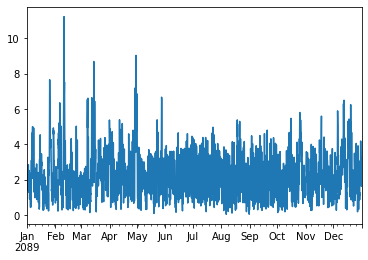

In [36]:
ws_30min['2089'].plot()

In [37]:
# cc_30min['2079'].plot()

In [38]:
# ap_30min['2079'].plot()

In [39]:
# Global Solar Radiation
gsr_30min = df['rsds'].reindex(idx_30min)

In [40]:
# Winter Day in LA
# df['rsds']['2079-01-01'].plot(marker="*")

In [41]:
# Summer Day in LA
# df['rsds']['2079-07-01'].plot(marker="*")

In [42]:
# Getting the sun height from pvlib module
loc = Location(33.9416, 360 - 118.4085, tz='UTC', altitude=75, name='Los Angeles')
times_loc = idx_30min.tz_localize(loc.pytz, nonexistent='shift_backward', ambiguous=False)
sun_data = pvlib.solarposition.pyephem(times_loc, loc.latitude, loc.longitude)

In [43]:
sun_data

,apparent_elevation,apparent_azimuth,elevation,azimuth,apparent_zenith,zenith
2081-01-01 00:00:00+00:00,9.058932,234.398323,8.962701,234.398323,80.941068,81.037299
2081-01-01 00:30:00+00:00,3.960667,238.971489,3.765595,238.971489,86.039333,86.234405
2081-01-01 01:00:00+00:00,-0.868640,243.218201,-1.678490,243.218201,90.868640,91.678490
2081-01-01 01:30:00+00:00,-7.289525,247.204681,-7.324089,247.204681,97.289525,97.324089
2081-01-01 02:00:00+00:00,-13.133333,250.995983,-13.133333,250.995983,103.133333,103.133333
...,...,...,...,...,...,...
2100-12-31 21:30:00+00:00,28.882210,204.591473,28.853079,204.591473,61.117790,61.146921
2100-12-31 22:00:00+00:00,25.954422,211.627606,25.921406,211.627606,64.045578,64.078594
2100-12-31 22:30:00+00:00,22.403563,218.108431,22.364582,218.108431,67.596437,67.635418
2100-12-31 23:00:00+00:00,18.325843,224.037909,18.277325,224.037909,71.674157,71.722675


In [44]:
# gsr_30min

In [45]:
# Creating the dataframe df_sun with the global solar radiation rsds and the sun height h
df_sun = pd.DataFrame({'rsds':gsr_30min,'h':sun_data['elevation'].to_list()})

# WARNING: Because the sun values are average values, sometimes there is a data point when the sun is actually down.
# Creating the column gsr sun up in the dataframe
# If the sun height is < 0, gsr sun up = 0, otherwise gsr sun up = gsr
df_sun['rsds sun up'] = np.where(df_sun['h'] < 0, 0, df_sun['rsds'])

# Creating the column gsr final up in the dataframe
# Interpolating from 3Hour to 30min
df_sun['rsds final'] = df_sun['rsds sun up'].interpolate(method='polynomial', order=2) 

In [46]:
# Check for a winter day
# df_sun['rsds']['2079-01-01'].plot(marker="*", legend=True)
# df_sun['rsds final']['2079-01-01'].plot(legend=True)
# df_sun['h']['2079-01-01'].plot(legend=True)

In [47]:
# Check for a summer day
# df_sun['rsds']['2079-07-01'].plot(marker="*", legend=True)
# df_sun['rsds final']['2079-07-01'].plot(legend=True)
# df_sun['h']['2079-07-01'].plot(legend=True)

In [48]:
# Creating a dataframe with all data series
df_30min = pd.DataFrame({'tas':dbt_30min, 'huss':sh_30min, 'sfcWind':ws_30min, 'ps':ap_30min, 'clt':cc_30min, 'rsds':df_sun['rsds final'].to_list()})

In [49]:
df_30min.head()

,tas,huss,sfcWind,ps,clt,rsds
2081-01-01 00:00:00,14.981958,6.637085,2.125222,100363.044333,NaN,NaN
2081-01-01 00:30:00,14.981958,6.637085,2.125222,100363.044333,NaN,NaN
2081-01-01 01:00:00,14.981958,6.637085,2.125222,100363.044333,NaN,0.0
2081-01-01 01:30:00,15.134276,6.637085,2.125222,100363.044333,NaN,0.0
2081-01-01 02:00:00,14.860631,6.448848,1.949122,100358.252667,NaN,0.0


In [50]:
## Reindexing to 1HR
df_1H = df_30min.iloc[::2] 

In [51]:
df_1H.head()

,tas,huss,sfcWind,ps,clt,rsds
2081-01-01 00:00:00,14.981958,6.637085,2.125222,100363.044333,NaN,NaN
2081-01-01 01:00:00,14.981958,6.637085,2.125222,100363.044333,NaN,0.0
2081-01-01 02:00:00,14.860631,6.448848,1.949122,100358.252667,NaN,0.0
2081-01-01 03:00:00,13.723334,6.072374,1.596922,100348.669333,NaN,0.0
2081-01-01 04:00:00,12.491479,5.695900,1.244722,100339.086000,NaN,0.0


In [52]:
# Calculating the vapor pressure
df_1H['pv'] = ((df_1H['huss']/1000*df_1H['ps']/100)/(0.62198+df_1H['huss']/1000)) # PV is en hASP or mBar

# Calculating the saturated vapor pressure
df_1H.loc[df_1H['tas'] < 0, 'svp'] = 6.105 * np.exp((21.875*df_1H['tas'])/(265.5+df_1H['tas']))
df_1H.loc[df_1H['tas'] > 0, 'svp'] = 6.105 * np.exp((17.269*df_1H['tas'])/(237.3+df_1H['tas']))

# Calculating the Relative Humidity in percentage
df_1H['hurs'] = df_1H['pv']/df_1H ['svp']*100

<ipython-input-52-fdbe6e18bb4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1H['pv'] = ((df_1H['huss']/1000*df_1H['ps']/100)/(0.62198+df_1H['huss']/1000)) # PV is en hASP or mBar
/Users/xuanluo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/xuanluo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:850: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [53]:
# df_1H['pv']

In [54]:
# df_1H['svp']

In [55]:
# df_1H['hurs']

In [56]:
# df_1H['hurs']['2079'].plot()

In [57]:
del df_1H['pv']
del df_1H['svp']

In [58]:
df_1H.head()

,tas,huss,sfcWind,ps,clt,rsds,hurs
2081-01-01 00:00:00,14.981958,6.637085,2.125222,100363.044333,NaN,NaN,62.243798
2081-01-01 01:00:00,14.981958,6.637085,2.125222,100363.044333,NaN,0.0,62.243798
2081-01-01 02:00:00,14.860631,6.448848,1.949122,100358.252667,NaN,0.0,60.968345
2081-01-01 03:00:00,13.723334,6.072374,1.596922,100348.669333,NaN,0.0,61.826707
2081-01-01 04:00:00,12.491479,5.695900,1.244722,100339.086000,NaN,0.0,62.887243


In [59]:
# Exporting data to .csv
# WARNING: The data are in UTC
ville = 'Los_Angeles_Airport'
path_out = r'/Users/xuanluo/Documents/cordex/results'
df_1H.to_csv(path_out + '/' + '2020-10-15_WDTF_'+ville+'_'+'hourly-weather-data-CORDEX_2081-2100-rcp85.csv', index=True, header=True)